**Zişan KARSATAR **

Resimler https://www.kaggle.com/zisankarsatar/panda-chameleon

In [83]:
import keras
keras.__version__

'2.3.1'

In [84]:
import os
print(os.listdir("../input/panda-chameleon"))

['train', 'validation', 'test']


Verisetleri ve miktarları,
Kod karmaşıklaşmasın diye kendim dataseti ayrılmış hali ile kullandım.
Ayrılmış veriler birbirinden farklıdır.

In [85]:
print('Total training Chameleon images:', len(os.listdir("../input/panda-chameleon/train/chameleon")))
print('Total training Panda images:', len(os.listdir("../input/panda-chameleon/train/panda")))
print("-------------------")
print('Total validaition Chameleon images:', len(os.listdir("../input/panda-chameleon/validation/chameleon")))
print('Total validaition Panda images:', len(os.listdir("../input/panda-chameleon/validation/panda")))
print("-------------------")
print('Total testing Chameleon images:', len(os.listdir("../input/panda-chameleon/test/chameleon")))
print('Total testing Panda images:', len(os.listdir("../input/panda-chameleon/test/panda")))

Total training Chameleon images: 100
Total training Panda images: 100
-------------------
Total validaition Chameleon images: 50
Total validaition Panda images: 50
-------------------
Total testing Chameleon images: 50
Total testing Panda images: 50


In [86]:
from keras import layers
from keras import models

Convent-Maxpooling
Veriler üzerinde filtreleme işlemi

In [87]:
model =models.Sequential()
model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))

Sınıflandırma İşlemi

In [88]:
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [89]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_29 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_25 (MaxPooling (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_30 (Conv2D)           (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_26 (MaxPooling (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_31 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_27 (MaxPooling (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_32 (Conv2D)           (None, 15, 15, 128)      

In [90]:
from keras import optimizers

model.compile(loss="binary_crossentropy",
             optimizer=optimizers.RMSprop(lr=1e-4),
             metrics=["acc"])

Normalizasyon

In [91]:
from keras.preprocessing.image import ImageDataGenerator

train= "../input/panda-chameleon/train"
validation = "../input/panda-chameleon/validation"

train_datagen = ImageDataGenerator(rescale=1./255)
validation_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train,
        target_size=(150,150),
        batch_size=20,
        class_mode="binary")

validation_generator = validation_datagen.flow_from_directory(
        validation,
        target_size=(150,150),
        batch_size=20,
        class_mode="binary")

Found 200 images belonging to 2 classes.
Found 100 images belonging to 2 classes.


In [92]:
for data_batch, labels_batch in train_generator:
    print("data batch shape:", data_batch.shape)
    print("labels batch shape:", labels_batch.shape)
    break;

data batch shape: (20, 150, 150, 3)
labels batch shape: (20,)


In [93]:
history = model.fit_generator(
        train_generator,
        steps_per_epoch=20,
        epochs=25,
        validation_data=validation_generator,
        validation_steps=5)

Epoch 1/25
20/20 [==============================] - 14s 714ms/step - loss: 0.6251 - acc: 0.5925 - val_loss: 0.4740 - val_acc: 0.8000
Epoch 2/25
20/20 [==============================] - 13s 670ms/step - loss: 0.3636 - acc: 0.8525 - val_loss: 0.2310 - val_acc: 0.8600
Epoch 3/25
20/20 [==============================] - 13s 662ms/step - loss: 0.2570 - acc: 0.9025 - val_loss: 0.2021 - val_acc: 0.8400
Epoch 4/25
20/20 [==============================] - 13s 661ms/step - loss: 0.1955 - acc: 0.9275 - val_loss: 0.7004 - val_acc: 0.8800
Epoch 5/25
20/20 [==============================] - 13s 675ms/step - loss: 0.1217 - acc: 0.9725 - val_loss: 0.1532 - val_acc: 0.9100
Epoch 6/25
20/20 [==============================] - 14s 677ms/step - loss: 0.0731 - acc: 0.9800 - val_loss: 0.1607 - val_acc: 0.8100
Epoch 7/25
20/20 [==============================] - 13s 663ms/step - loss: 0.0693 - acc: 0.9775 - val_loss: 0.5329 - val_acc: 0.9200
Epoch 8/25
20/20 [==============================] - 13s 669ms/step - 

In [94]:
model.save("chameleon_panda.h5")

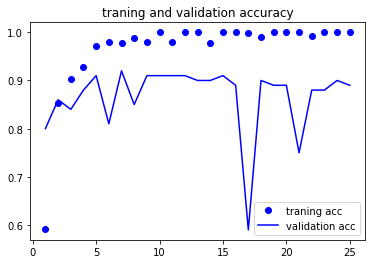

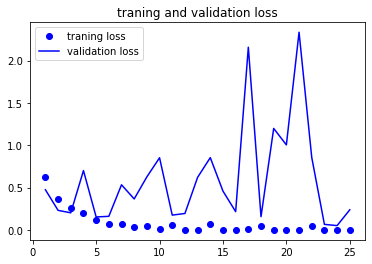

In [95]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history["val_acc"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]

epochs = range(1, len(acc)+1)

plt.plot(epochs, acc, "bo", label="traning acc")
plt.plot(epochs, val_acc, "b", label="validation acc")
plt.title("traning and validation accuracy")
plt.legend()

plt.figure()

plt.plot(epochs, loss, "bo", label="traning loss")
plt.plot(epochs, val_loss, "b", label="validation loss")
plt.title("traning and validation loss")
plt.legend()

plt.show()

Accuary grafiği için ;
* Eposch sayısı arttırkça train_acc düzensizde olsa artmaktadır. 
* val_acc ani düşüşler bulunmaktadır. 5-10 epoch'tan sonra düşüşe geçmiştir.
* Algoritma 10. epochtan sonra ezberliyor olabilir.
* val_acc 15-20 epoch arasında en büyük farkı almıştır.
* Birlikte gitmeleri gerçek hayat problemlerimiz için daha elverişli olurdu.

Loss grafiği için konuşucak olursak;
* Eposch sayısı arttırkça train_loss azalmaktadır.            
* Bu grafikte 5. epochtan sonra eposh kesme işlemi yapmak algoritmayı kurtarabilir.

In [96]:
from keras.preprocessing.image import ImageDataGenerator

test = "../input/panda-chameleon/test"

test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
        test,
        target_size=(150, 150),
        batch_size=5,
        class_mode='binary')

test_loss, test_acc = model.evaluate_generator(test_generator, steps=5)
print('test acc:', test_acc)
print('test loss:', test_loss)

Found 100 images belonging to 2 classes.
test acc: 0.8799999952316284
test loss: 0.11411921679973602


<h2>Sonuçlar</h2>
<table style="align:rigth">
  <tr>
    <th></th>
    <th>Accuary</th> 
    <th>Loss</th>
  </tr>
  <tr>
    <td>İlk Test</td>
    <td>0.88</td>
    <td>0.11</td>
  </tr>
 
</table>

<h1>2.Bölüm Data Augment</h1>

In [97]:
datagen = ImageDataGenerator(
                            rotation_range=40,
                            width_shift_range=0.2,
                            height_shift_range=0.2,
                            shear_range=0.2,
                            zoom_range=0.2,
                            horizontal_flip=True,
                            fill_mode='nearest')

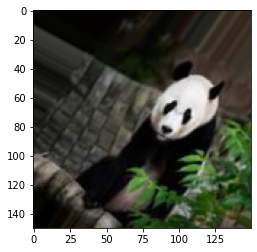

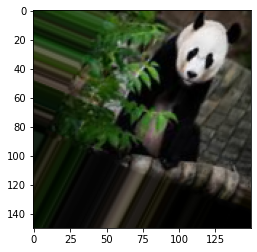

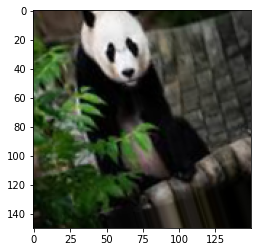

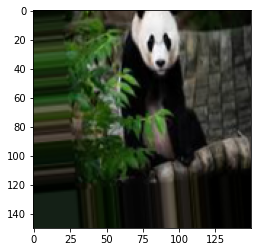

In [98]:
import matplotlib.pyplot as plt
from keras.preprocessing import image

panda="../input/panda-chameleon/train/panda"

fnames = [os.path.join(panda, fname) for fname in os.listdir(panda)]

img_path = fnames[4]

img = image.load_img(img_path, target_size = (150, 150))

x = image.img_to_array(img)

x = x.reshape((1,) + x.shape)

i = 0
for batch in datagen.flow(x, batch_size = 1):
    plt.figure()
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
        break
plt.show()

In [99]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation = 'relu', input_shape = (150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation = 'relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation = 'relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation = 'relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())
model.add(layers.Dense(512, activation = 'relu'))
model.add(layers.Dense(1, activation = 'sigmoid'))

model.compile(loss = 'binary_crossentropy',
             optimizer=optimizers.RMSprop(lr=1e-4),
             metrics=['acc'])

In [100]:
train_datagen = ImageDataGenerator(
                rescale = 1./255,
                rotation_range=40,
                width_shift_range=0.2,
                height_shift_range=0.2,
                shear_range=0.2,
                zoom_range=0.2,
                horizontal_flip=True)

In [101]:
test_datagen = ImageDataGenerator(rescale=1./255)

train= "../input/panda-chameleon/train"
validation = "../input/panda-chameleon/validation"

train_generator = train_datagen.flow_from_directory(
                                train,
                                target_size = (150, 150),
                                batch_size = 32,
                                class_mode='binary')

validation_generator = validation_datagen.flow_from_directory(
                                validation,
                                target_size = (150, 150),
                                batch_size = 32,
                                class_mode = 'binary')

history = model.fit_generator(
                            train_generator,
                            steps_per_epoch = 20,
                            epochs = 25,
                            validation_data = validation_generator,
                            validation_steps = 5)

Found 200 images belonging to 2 classes.
Found 100 images belonging to 2 classes.
Epoch 1/25
20/20 [==============================] - 18s 885ms/step - loss: 0.6768 - acc: 0.5915 - val_loss: 0.6000 - val_acc: 0.6439
Epoch 2/25
20/20 [==============================] - 18s 891ms/step - loss: 0.5814 - acc: 0.6849 - val_loss: 0.4426 - val_acc: 0.8258
Epoch 3/25
20/20 [==============================] - 18s 896ms/step - loss: 0.4571 - acc: 0.7956 - val_loss: 0.3338 - val_acc: 0.8409
Epoch 4/25
20/20 [==============================] - 17s 854ms/step - loss: 0.4060 - acc: 0.8169 - val_loss: 0.1455 - val_acc: 0.8269
Epoch 5/25
20/20 [==============================] - 18s 877ms/step - loss: 0.3903 - acc: 0.8187 - val_loss: 0.3434 - val_acc: 0.8788
Epoch 6/25
20/20 [==============================] - 17s 835ms/step - loss: 0.3670 - acc: 0.8401 - val_loss: 0.3682 - val_acc: 0.7879
Epoch 7/25
20/20 [==============================] - 18s 890ms/step - loss: 0.2816 - acc: 0.8868 - val_loss: 0.3914 - val

In [102]:
model.save("chameleon_panda2.h5")

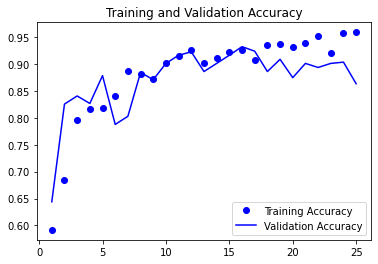

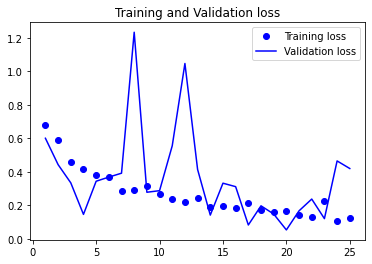

In [103]:
acc = history.history['acc']
val_acc = history.history['val_acc']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training Accuracy')
plt.plot(epochs, val_acc, 'b', label = 'Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and Validation loss')
plt.legend()

plt.show()

<h4>Data augmentation uygulamak ilk örneğmize göre daha olumlu sonuçlar sağlamıştır. Hem accuarcy hemde loss grafiği ilk örneğe göre gülümsüyor. :)</h4>

Accuary grafiği için ;
*  Eposch sayısı arttırkça train_acc düzensizde olsa artmaktadır. 
*  vall_acc train_acc ile nerdeyse berbarber ilerlemekte.
*  Önceki grafiğe göre data augmentation uygulamak hem ezberlemeye önlem olmuş hemde train ve val değerlerini birbirlerine yakınlaştırmıştır.
*  Gerçek hayat problemleri önceki örneğe göre için elverişlidir.
*  Yukarıdaki sonuçlara baktığımda val_acc en iyi değerin 16. epochta aldığını görüyorum daha sonra düşüş yaşamıştır.

Loss grafiği için konuşucak olursak;
* Önceki grafiğe göre train_loss değerleri yine aynı 0.8-0.0 arasındadır.
* Önceki grafiğe göre loss'lar epoch sayısı arttıkça birbirlerine daha çok yaklaşmışlardır.
* val_loss ta düşme vardır. Önceki grafikte en yüksek 2.0 değerinden yüksekti. bu grafikte en yüksek 1.2 değerindedir.
* Eposch sayısı arttırkça tran_loss azalmaktadır.
* val_loss değerinin en düşük oldupu yer 20. epoch civarıdır.

In [104]:
from keras.preprocessing.image import ImageDataGenerator

test = "../input/panda-chameleon/test"

test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
        test,
        target_size=(150, 150),
        batch_size=5,
        class_mode='binary')

test_loss, test_acc = model.evaluate_generator(test_generator, steps=5)
print('test acc:', test_acc)
print('test loss:', test_loss)

Found 100 images belonging to 2 classes.
test acc: 0.9200000166893005
test loss: 0.0003859138523694128


<h2>Sonuçlar</h2>
<table style="align:left">
  <tr>
    <th></th>
    <th>Accuary</th> 
    <th>Loss</th>
  </tr>
  <tr>
    <td>İlk Test</td>
    <td>0.88</td>
    <td>0.11</td>
  </tr>
  <tr>
    <td>Data Augmentation</td>
    <td>0.92</td>
    <td>0.001</td>
  </tr>
</table>

<h1>3.Bölüm Drop Out</h1>

In [105]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation = 'relu', input_shape = (150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation = 'relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation = 'relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation = 'relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.5))

In [106]:
model.add(layers.Flatten())
model.add(layers.Dense(512, activation = 'relu'))
model.add(layers.Dense(1, activation = 'sigmoid'))

model.compile(loss = 'binary_crossentropy',
             optimizer=optimizers.RMSprop(lr=1e-4),
             metrics=['acc'])

In [107]:
model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_37 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_32 (MaxPooling (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_38 (Conv2D)           (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_33 (MaxPooling (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_39 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_34 (MaxPooling (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_40 (Conv2D)           (None, 15, 15, 128)     

In [108]:
train_datagen = ImageDataGenerator(
                rescale = 1./255,
                rotation_range=40,
                width_shift_range=0.2,
                height_shift_range=0.2,
                shear_range=0.2,
                zoom_range=0.2,
                horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

train= "../input/panda-chameleon/train"
validation = "../input/panda-chameleon/validation"

train_generator = train_datagen.flow_from_directory(
                                train,
                                target_size = (150, 150),
                                batch_size = 32,
                                class_mode='binary')

validation_generator = validation_datagen.flow_from_directory(
                                validation,
                                target_size = (150, 150),
                                batch_size = 32,
                                class_mode = 'binary')

history = model.fit_generator(
                            train_generator,
                            steps_per_epoch = 20,
                            epochs = 25,
                            validation_data = validation_generator,
                            validation_steps = 5)

Found 200 images belonging to 2 classes.
Found 100 images belonging to 2 classes.
Epoch 1/25
20/20 [==============================] - 18s 900ms/step - loss: 0.6505 - acc: 0.6074 - val_loss: 0.6992 - val_acc: 0.5682
Epoch 2/25
20/20 [==============================] - 18s 895ms/step - loss: 0.5992 - acc: 0.6926 - val_loss: 0.4441 - val_acc: 0.8409
Epoch 3/25
20/20 [==============================] - 17s 840ms/step - loss: 0.4832 - acc: 0.7629 - val_loss: 0.3065 - val_acc: 0.8030
Epoch 4/25
20/20 [==============================] - 18s 900ms/step - loss: 0.4482 - acc: 0.7889 - val_loss: 0.2590 - val_acc: 0.8654
Epoch 5/25
20/20 [==============================] - 18s 907ms/step - loss: 0.3923 - acc: 0.8363 - val_loss: 0.4995 - val_acc: 0.8485
Epoch 6/25
20/20 [==============================] - 17s 861ms/step - loss: 0.3105 - acc: 0.8504 - val_loss: 0.3542 - val_acc: 0.8939
Epoch 7/25
20/20 [==============================] - 17s 860ms/step - loss: 0.3111 - acc: 0.8838 - val_loss: 0.2435 - val

In [109]:
model.save("chameleon_panda3.h5")

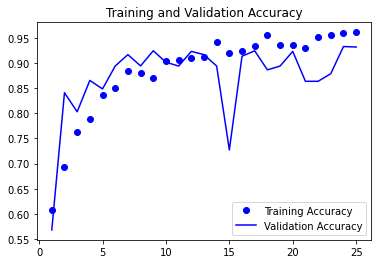

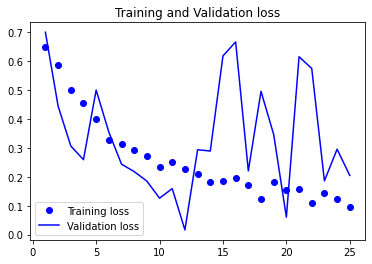

In [110]:
acc = history.history['acc']
val_acc = history.history['val_acc']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training Accuracy')
plt.plot(epochs, val_acc, 'b', label = 'Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and Validation loss')
plt.legend()

plt.show()

Ezberlemenin önüne geçmek için kullandığımız bir diğer yöntem Drop_out yönteminde :

Accuary grafiği için ;
*  Eposch sayısı arttırkça train_acc düzensizde olsa artmaktadır. 
*  vall_acc train_acc ile nerdeyse berbarber ilerlemekte.
*  Drop_out yöntemi önceki data_autmentation yönetimine göre loss ve acc arttırmıştır.
*  Gerçek hayat problemleri için biraz daha yalşatık.
*  Yukarıdaki sonuçlara baktığımda val_acc en iyi değerin 12. epochta aldığını görüyorum daha sonra düşüş yaşamıştır.

Loss grafiği için konuşucak olursak;
* Önceki grafiğe göre train_loss alt sınır değeri yükselmiştr.
* val_loss ta düşme vardır. Önceki grafikte en yüksek 1.2 değerinden yüksekti. bu grafikte en yüksek 0.7 değerindedir.
* Eposch sayısı arttırkça tran_loss azalmaktadır.
* val_loss un en düşük olduğu epoch 12 olduğu için bir sonraki epoch kesme örneğini 12. epochtan keserek yapacağım.

In [111]:
from keras.preprocessing.image import ImageDataGenerator

test = "../input/panda-chameleon/test"

test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
        test,
        target_size=(150, 150),
        batch_size=5,
        class_mode='binary')

test_loss, test_acc = model.evaluate_generator(test_generator, steps=5)
print('test acc:', test_acc)
print('test loss:', test_loss)

Found 100 images belonging to 2 classes.
test acc: 0.9599999785423279
test loss: 0.027219360694289207


<h2>Sonuçlar</h2>
<table style="align:left">
  <tr>
    <th></th>
    <th>Accuary</th> 
    <th>Loss</th>
  </tr>
  <tr>
    <td>İlk Test</td>
    <td>0.88</td>
    <td>0.11</td>
  </tr>
  <tr>
    <td>Data Augmentation</td>
    <td>0.92</td>
    <td>0.001</td>
  </tr>
    <tr>
    <td>Drop Out</td>
    <td>0.95</td>
    <td>0.02</td>
  </tr>
</table>

<h1>4.Bölüm Epoch kesme</h1>

In [117]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation = 'relu', input_shape = (150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation = 'relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation = 'relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation = 'relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.5))

model.add(layers.Flatten())
model.add(layers.Dense(512, activation = 'relu'))
model.add(layers.Dense(1, activation = 'sigmoid'))

model.compile(loss = 'binary_crossentropy',
             optimizer=optimizers.RMSprop(lr=1e-4),
             metrics=['acc'])

train_datagen = ImageDataGenerator(
                rescale = 1./255,
                rotation_range=40,
                width_shift_range=0.2,
                height_shift_range=0.2,
                shear_range=0.2,
                zoom_range=0.2,
                horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

train= "../input/panda-chameleon/train"
validation = "../input/panda-chameleon/validation"

train_generator = train_datagen.flow_from_directory(
                                train,
                                target_size = (150, 150),
                                batch_size = 20,
                                class_mode='binary')

validation_generator = validation_datagen.flow_from_directory(
                                validation,
                                target_size = (150, 150),
                                batch_size = 5,
                                class_mode = 'binary')

Found 200 images belonging to 2 classes.
Found 100 images belonging to 2 classes.


In [118]:
history = model.fit_generator(
                            train_generator,
                            steps_per_epoch = 20,
                            epochs = 12,
                            validation_data = validation_generator,
                            validation_steps = 5)

Epoch 1/12
20/20 [==============================] - 12s 596ms/step - loss: 0.6808 - acc: 0.5375 - val_loss: 0.6654 - val_acc: 0.8400
Epoch 2/12
20/20 [==============================] - 11s 570ms/step - loss: 0.5712 - acc: 0.7250 - val_loss: 0.2600 - val_acc: 0.7600
Epoch 3/12
20/20 [==============================] - 12s 593ms/step - loss: 0.4701 - acc: 0.7800 - val_loss: 0.2928 - val_acc: 0.9200
Epoch 4/12
20/20 [==============================] - 12s 579ms/step - loss: 0.3787 - acc: 0.8375 - val_loss: 0.3149 - val_acc: 0.8000
Epoch 5/12
20/20 [==============================] - 11s 572ms/step - loss: 0.4146 - acc: 0.8100 - val_loss: 0.2175 - val_acc: 0.9600
Epoch 6/12
20/20 [==============================] - 11s 573ms/step - loss: 0.3351 - acc: 0.8550 - val_loss: 0.1758 - val_acc: 0.8400
Epoch 7/12
20/20 [==============================] - 11s 568ms/step - loss: 0.3012 - acc: 0.8775 - val_loss: 0.5896 - val_acc: 0.8400
Epoch 8/12
20/20 [==============================] - 12s 577ms/step - 

In [119]:
model.save("chameleon_panda3.h5")

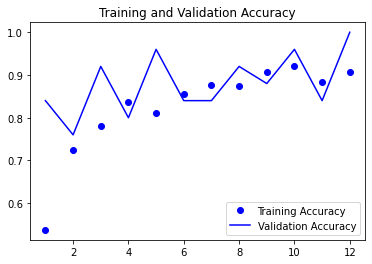

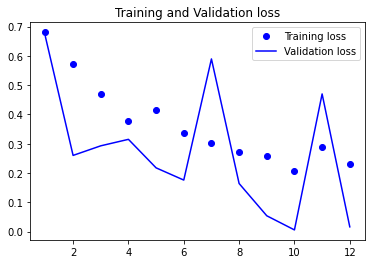

In [120]:
acc = history.history['acc']
val_acc = history.history['val_acc']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training Accuracy')
plt.plot(epochs, val_acc, 'b', label = 'Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and Validation loss')
plt.legend()

plt.show()

* val_acc bazı yerlerde train_acc geçmiş. 
* epoch sayısı arttıkça accuarcy değeleri her ikisi içinde düzensiz olsada gidereke artmış.
* val_loss ve train_loss epoch sayısı arttıkça onlar içinde azalma olmuştur.

In [121]:
from keras.preprocessing.image import ImageDataGenerator

test = "../input/panda-chameleon/test"

test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
        test,
        target_size=(150, 150),
        batch_size=5,
        class_mode='binary')

test_loss, test_acc = model.evaluate_generator(test_generator, steps=5)
print('test acc:', test_acc)
print('test loss:', test_loss)

Found 100 images belonging to 2 classes.
test acc: 0.9599999785423279
test loss: 0.3776405453681946


<h2>Sonuçlar</h2>

<table style="align:left">
  <tr>
    <th></th>
    <th>Accuary</th> 
    <th>Loss</th>
  </tr>
  <tr>
    <td>İlk Test</td>
    <td>0.88</td>
    <td>0.11</td>
  </tr>
  <tr>
    <td>Data Augmentation</td>
    <td>0.92</td>
    <td>0.001</td>
  </tr>
    <tr>
    <td>Drop Out</td>
    <td>0.95</td>
    <td>0.002</td>
  </tr>
    <tr>
    <td>Epoch Kesme</td>
    <td>0.96</td>
    <td>0.37</td>
  </tr>
</table>

Sonuçlara baktığımızda her adımda acuury artış gösterirken, loss karasız kalmıştır.